# A2.1 Regresión logística y validación cruzada

1. Se importan los datos correspondientes a los niveles de PM2.5 del año 2022 al ambiente de trabajo.

In [18]:
import pandas as pd

# Importar los datos del csv
df = pd.read_csv('/content/drive/MyDrive/ITC/10mo Semestre/Inteligencia Artificial I/Tareas/2.1 Regresión logistica y validación cruzada/MeteoContDB.csv')

# Imprimir los 10 primeros registros
print(df.head(10))

# Imprimir la info del dataframe
df.info()

        Fecha  PM2.5 (ug/m³)  tavg  prcp   wdir  wspd    pres  tavg_pres  \
0  2022-01-01           16.0  25.1   0.0  288.0   8.7  1005.4   25235.54   
1  2022-01-02            8.0  14.1   0.0  358.0  20.7  1024.2   14441.22   
2  2022-01-03            6.0   8.1   0.0   80.0   7.6  1030.5    8347.05   
3  2022-01-04           19.0  11.8   0.0  158.0   5.9  1020.9   12046.62   
4  2022-01-05           15.0  17.1   0.0  270.0   6.9  1012.7   17317.17   
5  2022-01-06           16.0  18.6   0.0  339.0   6.6  1013.2   18845.52   
6  2022-01-07           21.0  13.3   0.4   61.0  10.8  1018.8   13550.04   
7  2022-01-08           38.0  16.3   0.0  200.0   6.9  1015.5   16552.65   
8  2022-01-09           25.0  18.9   0.0  334.0   9.0  1020.3   19283.67   
9  2022-01-10            8.0  12.9   0.0    2.0  16.3  1032.8   13323.12   

   tavg_wspd  prcp_pres  
0     218.37       0.00  
1     291.87       0.00  
2      61.56       0.00  
3      69.62       0.00  
4     117.99       0.00  
5     1

- Se convierte el tipo de dato de las variable fecha de object a datetime.

In [19]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d", errors="coerce")

- Se verifica si la conversión fué exitosa.

In [20]:
# Imprimir los 10 primeros registros
print(df.head(10))

# Imprimir la info del dataframe
df.info()

       Fecha  PM2.5 (ug/m³)  tavg  prcp   wdir  wspd    pres  tavg_pres  \
0 2022-01-01           16.0  25.1   0.0  288.0   8.7  1005.4   25235.54   
1 2022-01-02            8.0  14.1   0.0  358.0  20.7  1024.2   14441.22   
2 2022-01-03            6.0   8.1   0.0   80.0   7.6  1030.5    8347.05   
3 2022-01-04           19.0  11.8   0.0  158.0   5.9  1020.9   12046.62   
4 2022-01-05           15.0  17.1   0.0  270.0   6.9  1012.7   17317.17   
5 2022-01-06           16.0  18.6   0.0  339.0   6.6  1013.2   18845.52   
6 2022-01-07           21.0  13.3   0.4   61.0  10.8  1018.8   13550.04   
7 2022-01-08           38.0  16.3   0.0  200.0   6.9  1015.5   16552.65   
8 2022-01-09           25.0  18.9   0.0  334.0   9.0  1020.3   19283.67   
9 2022-01-10            8.0  12.9   0.0    2.0  16.3  1032.8   13323.12   

   tavg_wspd  prcp_pres  
0     218.37       0.00  
1     291.87       0.00  
2      61.56       0.00  
3      69.62       0.00  
4     117.99       0.00  
5     122.76      

- La variable que se trata de predecir es el PM2.5, se puede binarizar de esta forma:
  - 0 para valores inferiores a la media.
  - 1 para valores superiores a la media.

In [21]:
# Calcular la media
media = df["PM2.5 (ug/m³)"].mean()

# Binarizar la variable
df["PM2.5_binary"] = df["PM2.5 (ug/m³)"].apply(lambda x: 0 if x < media else 1)

# Imprimir resultados
print(df["PM2.5_binary"].value_counts())
df.head(10)

PM2.5_binary
0    218
1    145
Name: count, dtype: int64


,Fecha,PM2.5 (ug/m³),tavg,prcp,wdir,wspd,pres,tavg_pres,tavg_wspd,prcp_pres,PM2.5_binary
0,2022-01-01,16.0,25.1,0.0,288.0,8.7,1005.4,25235.54,218.37,0.00,0
1,2022-01-02,8.0,14.1,0.0,358.0,20.7,1024.2,14441.22,291.87,0.00,0
2,2022-01-03,6.0,8.1,0.0,80.0,7.6,1030.5,8347.05,61.56,0.00,0
3,2022-01-04,19.0,11.8,0.0,158.0,5.9,1020.9,12046.62,69.62,0.00,1
4,2022-01-05,15.0,17.1,0.0,270.0,6.9,1012.7,17317.17,117.99,0.00,0
5,2022-01-06,16.0,18.6,0.0,339.0,6.6,1013.2,18845.52,122.76,0.00,0
6,2022-01-07,21.0,13.3,0.4,61.0,10.8,1018.8,13550.04,143.64,407.52,1
7,2022-01-08,38.0,16.3,0.0,200.0,6.9,1015.5,16552.65,112.47,0.00,1
8,2022-01-09,25.0,18.9,0.0,334.0,9.0,1020.3,19283.67,170.10,0.00,1
9,2022-01-10,8.0,12.9,0.0,2.0,16.3,1032.8,13323.12,210.27,0.00,0


2. Se separan los datos en entrenamiento y prueba, con una relación de 80/20.

In [22]:
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(["PM2.5 (ug/m³)", "PM2.5_binary", "Fecha"], axis=1), df["PM2.5_binary"], test_size=0.2, random_state=42)

# Imprimir conteos en entrenamiento y prueba
print("Conteo original: ", df["PM2.5_binary"].value_counts())
print("Conteo en entrenamiento: ", Y_train.value_counts())
print("Conteo en prueba: ", Y_test.value_counts())

Conteo original:  PM2.5_binary
0    218
1    145
Name: count, dtype: int64
Conteo en entrenamiento:  PM2.5_binary
0    177
1    113
Name: count, dtype: int64
Conteo en prueba:  PM2.5_binary
0    41
1    32
Name: count, dtype: int64


3. Se mide la exactitud de un modelo de regresión logística usando la técnica de 10-fold cross-validation.

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Definir el modelo con pipeline que incluye estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LogisticRegression(penalty=None, class_weight="balanced")

# Definir la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar la exactitud con validación cruzada
accuracy_scores = cross_val_score(model, X_train_scaled, Y_train, cv=cv, scoring='accuracy')

# Imprimir los resultados
print("Exactitud en entrenamiento: ", accuracy_scores.mean())
print("Exactitud en cada fold: ", accuracy_scores)

Exactitud en entrenamiento:  0.6620689655172414
Exactitud en cada fold:  [0.65517241 0.68965517 0.62068966 0.72413793 0.72413793 0.75862069
 0.55172414 0.68965517 0.55172414 0.65517241]


Hay cierta variabilidad en los folds de la validación cruzada, lo que indica que el modelo puede ser sensible a los datos de entrenamiento.

4. Se entrena un modelo de regresión logística utilizando todo el subconjunto de datos de entrenamiento. Se genera un vector de probabilidades para los datos de prueba y se reporta la exactitud, sensibilidad y especificidad del modelo para 3 umbrales diferentes
 - 0.5 - Balanceado
 - 0.4 - Más sensibilidad, detectando más casos de PM2.5 alto aunque haya más falsos positivos.
 - 0.6 - Más especificidad, detectando más casos de PM2.5 bajo, aunque se le escapen más valores altos.

 Se genera su respectiva matriz de confusión.

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Aplicar escalado a los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model.fit(X_train_scaled, Y_train)

# Generar probabilidades de predicción
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase 1

# Definir 3 umbrales: estándar (0.5), menor (0.4), mayor (0.6)
thresholds = [0.5, 0.4, 0.6]

# Evaluación de cada umbral
results = {}
for t in thresholds:
  y_pred = (y_probs >= t).astype(int)
  cm = confusion_matrix(Y_test, y_pred)

  # Extraer métricas
  accuracy = accuracy_score(Y_test, y_pred)
  sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) # Sensibilidad = TP / (FN + TP)
  specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) # Especificidad = TN / (TN + FP)

  # Imprimir resultados
  print(f"Umbral: {t}")
  print(f"Accuracy: {accuracy}")
  print(f"Sensitivity: {sensitivity}")
  print(f"Specificity: {specificity}")
  print(f"Matriz de confusión: {cm}")
  print("-------------------------")

Umbral: 0.5
Accuracy: 0.7123287671232876
Sensitivity: 0.71875
Specificity: 0.7073170731707317
Matriz de confusión: [[29 12]
 [ 9 23]]
-------------------------
Umbral: 0.4
Accuracy: 0.6438356164383562
Sensitivity: 0.875
Specificity: 0.4634146341463415
Matriz de confusión: [[19 22]
 [ 4 28]]
-------------------------
Umbral: 0.6
Accuracy: 0.726027397260274
Sensitivity: 0.5625
Specificity: 0.8536585365853658
Matriz de confusión: [[35  6]
 [14 18]]
-------------------------


- **Umbral 0.6**: Tiene una alta especificidad, lo que quiere decir que cuando dice que no hay contaminación alta, casi siempre tiene razón. Sin embargo, se le escapan muchos casos de contaminación alta debido a su baja sensibilidad.
- **Umbral 0.4**: Detecta casi todos los casos de contaminación alta debido a su alta sensibilidad, aunque hay mayor riesgo de falsos positivos debido a su baja especificidad.
- **Umbral 0.5**: Tiene la sensibilidad y especificidad balanceadas, minimizando los errores en ambas direcciones entre clases.

5. Se grafica la curva ROC para las probabilidades calculadas en el punto previo y se reporta el valor de la AUC.

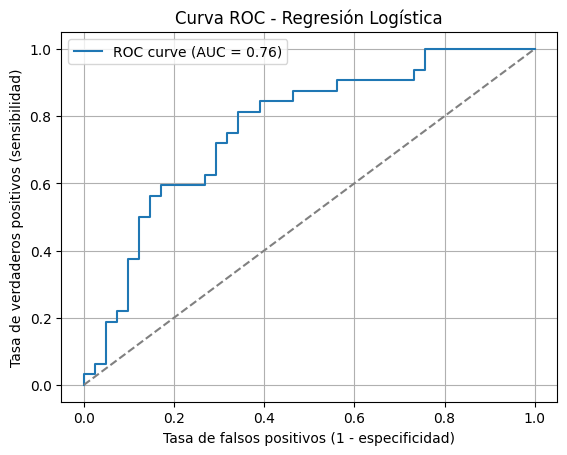

In [27]:
# Obtener la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_probs)
auc_value = roc_auc_score(Y_test, y_probs)

# Graficar la curva ROC
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de falsos positivos (1 - especificidad)")
plt.ylabel("Tasa de verdaderos positivos (sensibilidad)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()

Con un AUC de 0.76, se puede decir que el modelo tiene una capacidad de predicción moderada y por ende, un desempeño aceptable. Sin embargo, también se puede decir que podría mejorarse si se prueban con otras variables predictoras como el nivel de humedad y otras fuentes de contaminación.

6. Se imprimen los coeficientes generados del modelo y se interpretan los resultados.

In [28]:
# Obtener los coeficientes y los nombres de las variables
coeficientes = model.coef_[0]
nombres_variables = X_train.columns

# Crear un DataFrame con los coeficientes y los nombres de las variables
df_coeficientes = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})

# Imprimir coeficientes
df_coeficientes

,Variable,Coeficiente
0,tavg,34.312399
1,prcp,4.569127
2,wdir,-0.111813
3,wspd,-1.264216
4,pres,-0.702375
5,tavg_pres,-35.666752
6,tavg_wspd,1.840065
7,prcp_pres,-4.726547


De acuerdo a los coeficientes, que indican la relación que hay entre cada variable independiente y la probabilidad de que los niveles PM2.5 sean altos, los valores positivos indican que un aumento en esa variable incrementa la probabilidad de un PM2.5 alto, mientras que una disminución indica lo contrario (una disminución de la probabilidad de un PM2.5 alto). En este caso, las variables más significativas sobre PM2.5 son:
-  **Temperatura promedio** (tavg): Los aumentos en la temperatura se asocian a mayor probabilidad de tener niveles altos de PM2.5.
- **Temperatura promedio con presion** (tavg_pres): Cuando la temperatura promedio y la presión aumentan juntas, se tiende a tener menores niveles de PM2.5.
- **Precipitación con presión** (prcp_pres): Cuando la precipitación y la presión aumentan juntas, se tiene menores niveles de PM2.5, aunque en menor medida.
- **Velocidad del viento** (wspd): A mayor velocidad del viento, se tiene menos PM2.5, ya que se dispersan los contaminantes.  